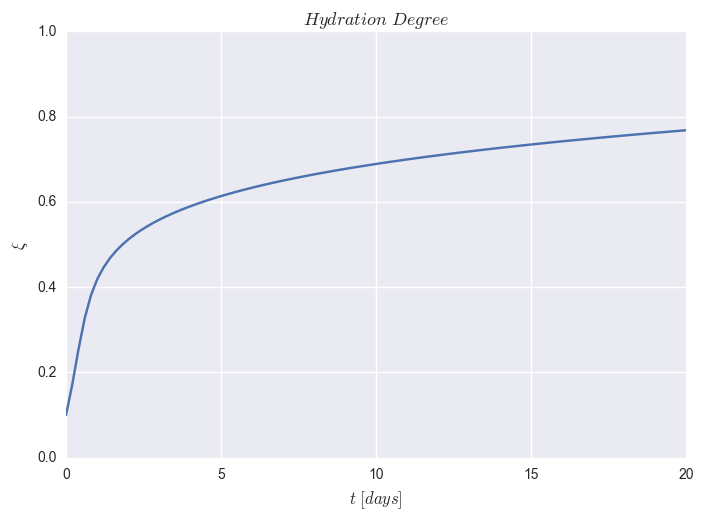

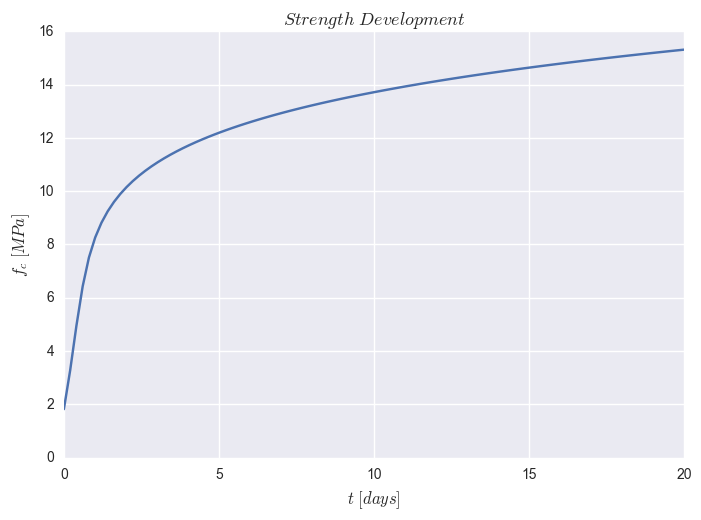

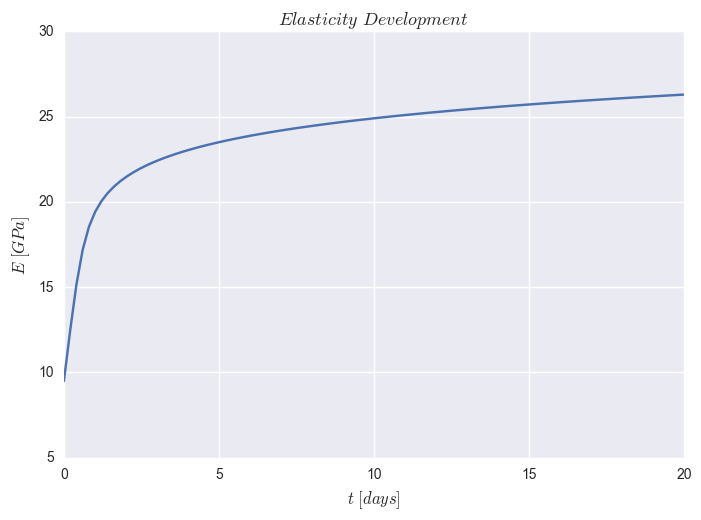

In [3]:
"""
@author: Onur Koc
Purpose: Hydration degree using arrhenius function in time
"""

import matplotlib.pyplot as plt
import numpy as np
import seaborn
from scipy import integrate

def hydration_degree (ksi, time):
    """Define the right hand-side of the the ode"""
    
    a, b, c, d, f = 3.2469, 51.9501, 509.7504, 5.1950, 0.086
    # Coefficients of the chemical affinity
    
    Af = a * ((1 - np.exp(-b * (ksi - f))) / (1 + c * (ksi - f) ** d))
    # Chemical affinity
    
    E_a = 4000
    # Activation energy [K]
    
    R = 1
    # Universal gas constant
    
    T_o = 25
    # Initial temperature
    
    T = 273.15 + T_o
    # Absolute temperature
    
    return Af * np.exp(-E_a / (R * T))

def comp_str (ksi_):
    """Development of comp. strength in time"""
    
    ksi_0 = 0.01
    # Initial hydration degree
    
    fc_inf = 20
    # Strength at infinity [MPa]
    
    return (ksi_ - ksi_0) / (1 - ksi_0) * fc_inf

def elasticity (ksi_):
    """Development of Young's modulus in time"""
    
    E_inf = 30
    # Elasticity at infinity [GPa]
    
    return E_inf * np.sqrt(ksi_)

s1d = 24 * 60 * 60
# One day in seconds

t1y = 365 * s1d
# One year in seconds

t1w = 20 * s1d
# One year in seconds

time = np.linspace(0.0, t1w, 100)
# Time variable discretized

ksi_init = 0.1
# Initial hydration at t = 0

hyd = integrate.odeint(hydration_degree, ksi_init, time)
# Definition of the hydration-ODE
    
fc_t = comp_str(hyd)
# Calling strength function

E_ = elasticity(hyd)
# Calling elasticity function

axes = plt.gca()
axes.set_ylim([0,1])

plt.figure(num=1, dpi=125, edgecolor='b')
plt.plot(time/s1d, hyd)
plt.title('$Hydration\ Degree$', fontsize=13)
plt.xlabel('$t\ [days]$', fontsize=12)
plt.ylabel('$\\xi$', fontsize=12)

plt.figure(num=2, dpi=125, edgecolor='b')
plt.plot(time/s1d, fc_t)
plt.title('$Strength\ Development$', fontsize=13)
plt.xlabel('$t\ [days]$', fontsize=12)
plt.ylabel('$f_c\ [MPa]$', fontsize=12)

plt.figure(num=3, dpi=125, edgecolor='b')
plt.plot(time/s1d, E_)
plt.title('$Elasticity\ Development$', fontsize=13)
plt.xlabel('$t\ [days]$', fontsize=12)
plt.ylabel('$E\ [GPa]$', fontsize=12)

plt.show()